Name: Yunyi Zhang<br>
Github Username: yunyizyz<br>
USC ID: 7518630167

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

1.(a) Load data.

In [34]:
df = pd.read_excel('../CCPP/Folds5x2_pp.xlsx', sheet_name='Sheet1')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


(b) Exploring the data:
i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


9568 rows and 5 columns are in this data set.<br>
Each row represents a data point collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load.<br>
Each column represents a feature:  Temperature (AT), Exhaust Vacuum (V), Ambient Pressure (AP), Relative Humidity (RH), and Energy Output (PE). The first four columns are independent variables, and the last column is the dependent variable.

ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.


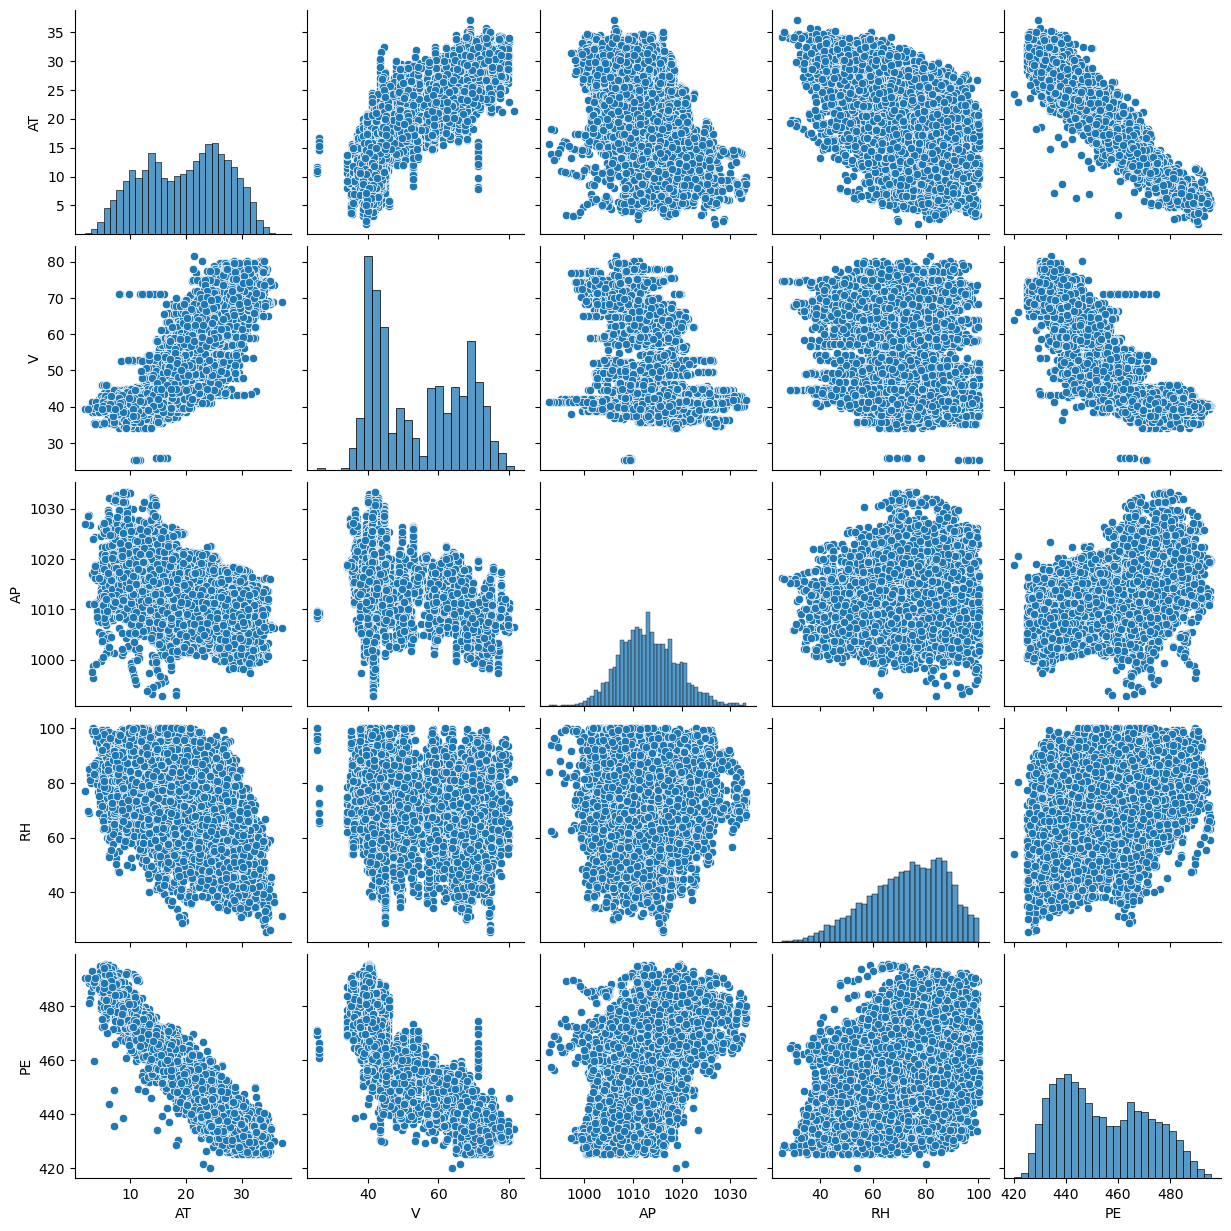

In [36]:
sns.pairplot(df)

From the pairplot, we can see that variables AT and PE, AT and V, PE and V have some linear relationship.

iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [37]:
statistics = {
    'Mean': df.mean(),
    'Median': df.median(),
    'Range': df.max() - df.min(),
    'Q1': df.quantile(0.25),
    'Q3': df.quantile(0.75),
    'IQR': df.quantile(0.75) - df.quantile(0.25)
}
summary_table = pd.DataFrame(statistics)
summary_table

,Mean,Median,Range,Q1,Q3,IQR
AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


(c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. <br>In which of the models is there a statistically significant association between the predictor and the response? <br>Create some plots to back
up your assertions. <br>Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [38]:
def simple_linear_reg_plot(column_name):
    y = df['PE']
    X = df[column_name].values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X, y)
    
    X_with_intercept = sm.add_constant(X)
    model_sm = sm.OLS(y, X_with_intercept).fit()
    p_value = model_sm.pvalues[1]  # p-value for the coefficient

    coefficient = model.coef_[0]
    simple_coef.append(coefficient)

    residuals = y - model.predict(X)
    std_residuals = residuals / np.sqrt(np.mean(residuals**2))

    r_squared = model.score(X, y)
    
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    axs[0].scatter(df[column_name], df['PE'], alpha=0.7, s=5)
    axs[0].plot(np.array(df[column_name]), model.predict(X), color='grey', linewidth=2)
    axs[0].set_title(f'Simple LR for {column_name} (R-squared: {r_squared:.2f}, p-value: {p_value:.5f})')
    axs[0].set_xlabel(column_name)
    axs[0].set_ylabel('PE')

    axs[1].scatter(X, std_residuals, alpha=0.7, s=5)
    axs[1].axhline(2.5, color='red', linestyle='--', label='Threshold')
    axs[1].axhline(-2.5, color='red', linestyle='--')
    axs[1].set_title('Studentized Residuals')
    axs[1].set_xlabel(column_name)
    axs[1].set_ylabel('Studentized Residuals')
    axs[1].legend()

    plt.show()

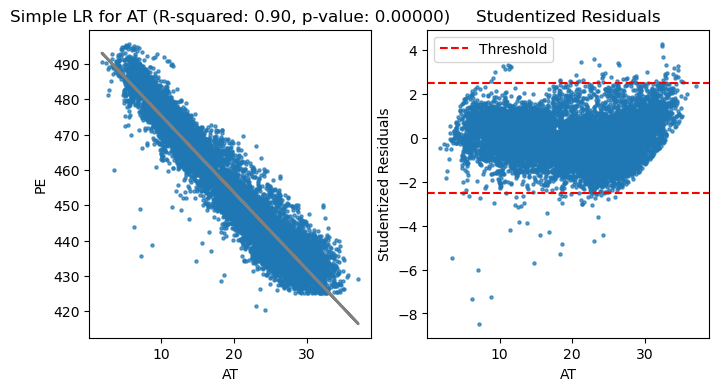

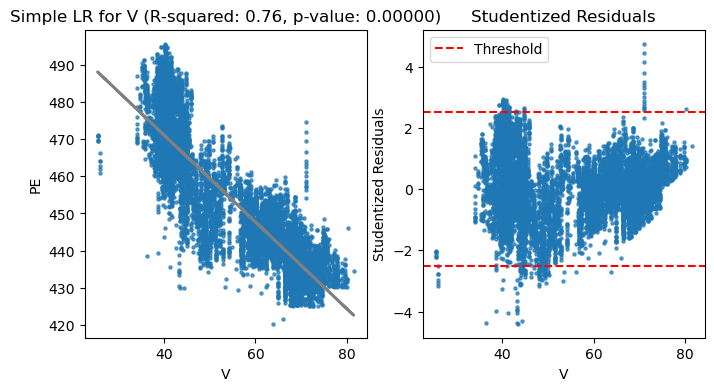

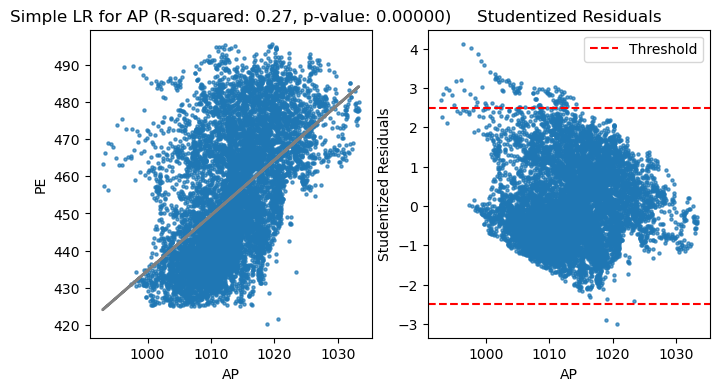

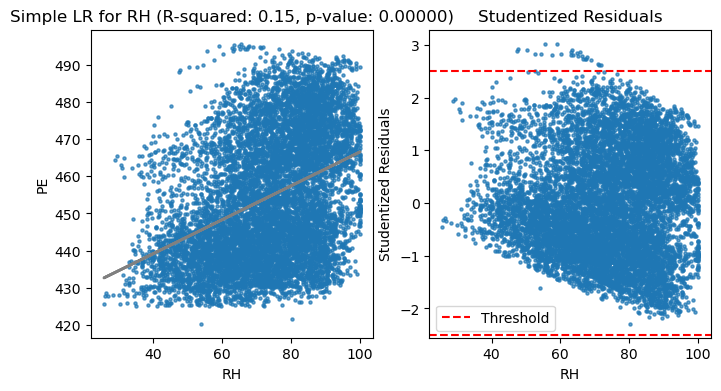

In [39]:
simple_coef=[]
for column_name in df.columns[:-1]:
    simple_linear_reg_plot(column_name)

In all the model, there is a statistically significant association between the predictor and the response. Model using AT got the highest r squared and may have the best prediction result.<br> I used the studentized residual to find the outliers. If need, I will consider to drop the residuals out side the the dash lines.

(d) Fit a multiple regression model to predict the response using all of the predictors.
<br>Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [40]:
X = df.drop('PE', axis=1) 
X = sm.add_constant(X)
y = df['PE']

model_multi = sm.OLS(y, X).fit()
multi_coef = model_multi.params.tolist()
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:52:36   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

For all the predictors, we can reject the null hypothesis H0 : βj = 0 because p value is smaller than 0.05. 

(e) How do your results from 1c compare to your results from 1d? <br>Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. <br>That is, each predictor is displayed as a single point in the plot. <br>Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.


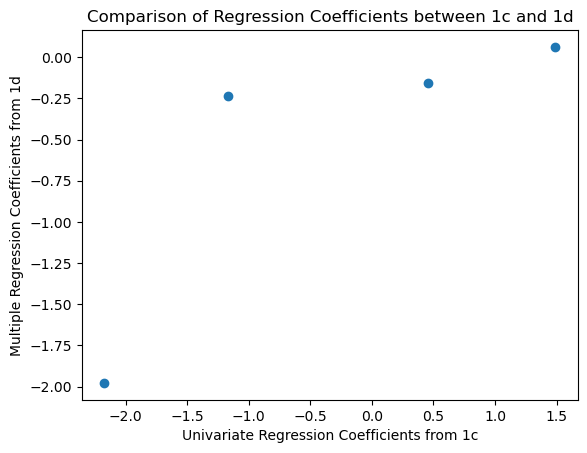

In [41]:
predictors = df.columns[:-1]
plt.scatter(simple_coef, multi_coef[1:])

plt.xlabel('Univariate Regression Coefficients from 1c')
plt.ylabel('Multiple Regression Coefficients from 1d')
plt.title('Comparison of Regression Coefficients between 1c and 1d')

plt.show()

Compare my result from 1c and 1d, the coefficients are not exactly same. This shows that include other independent variables into the regression model change the influence of a single variable to the result.

(f) Is there evidence of nonlinear association between any of the predictors and the response? <br>To answer this question, for each predictor X, fit a model of the form (polynomial regression)

In [42]:
for column_name in df.columns[:-1]:
    X = df[[column_name]]
    y = df['PE']
    
    poly = PolynomialFeatures(3)
    X_poly = poly.fit_transform(X)
    
    X_poly = sm.add_constant(X_poly)
    poly_model_sm = sm.OLS(y, X_poly).fit()
    print(column_name)
    print(poly_model_sm.summary())

AT
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:52:37   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      

From the result, we can see that AT, AP, RH have nonlinear association with the response.<br>
For AT, AP and RH, all three coefficients got p_value less than 0.05. Although some coefficients are small, there is still an evidence shows that the varible and PE has nonlinear association.

(g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [43]:
X = df.drop('PE', axis=1) 
y = df['PE']

interaction_terms = []
columns = X.columns

for col1, col2 in combinations(columns, 2):
    interaction_terms.append(f'{col1}*{col2}')

all_columns = list(columns) + interaction_terms
X_interactions = X.copy()

for col1, col2 in combinations(columns, 2):
    X_interactions[f'{col1}*{col2}'] = X[col1] * X[col2]

print(X_interactions)

X_interactions = sm.add_constant(X_interactions)
model_interactions = sm.OLS(y, X_interactions).fit()

print(model_interactions.summary())

         AT      V       AP     RH       AT*V       AT*AP      AT*RH  \
0     14.96  41.76  1024.07  73.17   624.7296  15320.0872  1094.6232   
1     25.18  62.96  1020.04  59.08  1585.3328  25684.6072  1487.6344   
2      5.11  39.40  1012.16  92.14   201.3340   5172.1376   470.8354   
3     20.86  57.32  1010.24  76.64  1195.6952  21073.6064  1598.7104   
4     10.82  37.50  1009.23  96.62   405.7500  10919.8686  1045.4284   
...     ...    ...      ...    ...        ...         ...        ...   
9563  16.65  49.69  1014.01  91.00   827.3385  16883.2665  1515.1500   
9564  13.19  39.18  1023.67  66.78   516.7842  13502.2073   880.8282   
9565  31.32  74.33  1012.92  36.48  2328.0156  31724.6544  1142.5536   
9566  24.48  69.45  1013.86  62.39  1700.1360  24819.2928  1527.3072   
9567  21.60  62.52  1017.23  67.87  1350.4320  21972.1680  1465.9920   

            V*AP       V*RH       AP*RH  
0     42765.1632  3055.5792  74931.2019  
1     64221.7184  3719.6768  60263.9632  
2     398

Interaction terms AT-V, AT-RH, V-AP, AP-H are statistically significant. The p values of these interaction terms are smaller than 0.05.

(h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? <br>Train the regression model on a randomly selected 70% subset of the data with all predictors. <br>Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.


The base model:

In [44]:
X = df.drop('PE', axis=1)
y = df['PE']

X_sub, X_test, y_sub, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

model_base = sm.OLS(y_sub, X_sub).fit()

y_pred = model_base.predict(X_test)
mse_base = mean_squared_error(y_test, y_pred)

print('Mean Squared Error (Base Model):', mse_base)
print(model_base.summary())

Mean Squared Error (Base Model): 24.902767114451827
                                 OLS Regression Results                                
Dep. Variable:                     PE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.342e+07
Date:                Fri, 22 Sep 2023   Prob (F-statistic):                        0.00
Time:                        14:52:37   Log-Likelihood:                         -20381.
No. Observations:                6697   AIC:                                  4.077e+04
Df Residuals:                    6693   BIC:                                  4.080e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025  

Add all possible interaction terms and quadratic nonlinearities:

In [68]:
poly_sub = PolynomialFeatures(2)
X_poly_sub = poly_sub.fit_transform(X_sub)
X_poly_test = poly_sub.transform(X_test)

feature_names = poly_sub.get_feature_names(X_sub.columns)

In [69]:
model_all = sm.OLS(y_sub, X_poly_sub).fit()

y_sub_all_pred = model_all.predict(X_poly_test)
mse_all = mean_squared_error(y_test, y_sub_all_pred)

print('Mean Squared Error (all interactions and quadratic):', mse_all)

print(model_all.summary(xname=feature_names))

Mean Squared Error (all interactions and quadratic): 17.1198617288254
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     6966.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:12:00   Log-Likelihood:                -19279.
No. Observations:                6697   AIC:                         3.859e+04
Df Residuals:                    6682   BIC:                         3.869e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

Based on p value, we can remove (AT AP),V^2,(V AP),(V RH).<br>
**The new model:**

In [70]:
indices_to_keep = [0, 1, 2, 3, 4, 5,6,8, 12,13,14]

X_poly_sub_new = X_poly_sub[:, indices_to_keep]
X_poly_test_new = X_poly_test[:, indices_to_keep]
feature_names_new = np.array(feature_names)[indices_to_keep]
feature_names_new

array(['1', 'AT', 'V', 'AP', 'RH', 'AT^2', 'AT V', 'AT RH', 'AP^2',
       'AP RH', 'RH^2'], dtype='<U5')

In [72]:
model_new = sm.OLS(y_sub, X_poly_sub_new).fit()
y_test_new_pred = model_new.predict(X_poly_test_new)

mse_new = mean_squared_error(y_test, y_test_new_pred)

print('Mean Squared Error:', mse_new)

print(model_new.summary())

Mean Squared Error: 17.14386677366273
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     9733.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:12:12   Log-Likelihood:                -19287.
No. Observations:                6697   AIC:                         3.860e+04
Df Residuals:                    6686   BIC:                         3.867e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.

(i) KNN Regression:
i. Perform k-nearest neighbor regression for this dataset using both normalized
and raw features. Find the value of k ∈ {1, 2, . . . , 100} that gives you the
best fit. Plot the train and test errors in terms of 1/k.

In [47]:
train_errors = []
test_errors = []

k_list = np.arange(1, 101)
inverse_k_list = 1 / k_list

for k in k_list:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_sub, y_sub)
    
    y_train_pred = knn.predict(X_sub)
    y_test_pred = knn.predict(X_test)
    
    train_error = mean_squared_error(y_sub, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)

print(f'min test mse: {min(test_errors)}')

min test mse: 15.729716367699991


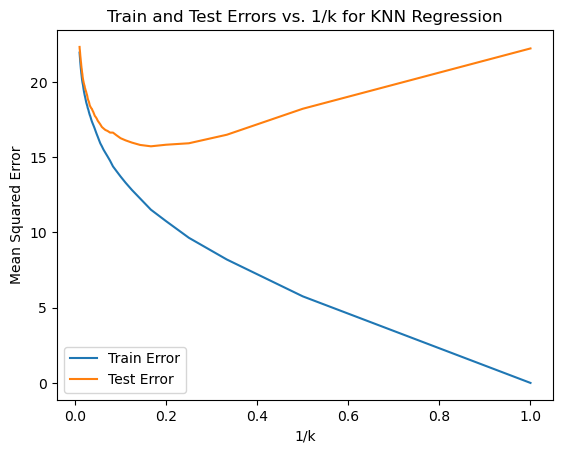

In [48]:
# Plot train and test errors in terms of 1/k
plt.plot(inverse_k_list, train_errors, label='Train Error')
plt.plot(inverse_k_list, test_errors, label='Test Error')
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test Errors vs. 1/k for KNN Regression')
plt.legend()
plt.show()

(j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

The knn model got the smallest test error.<br>For this dataset, knn model can get the better prediction result. It can better shows the relationship between PE and other varibles is non-linear. <br>However, although linear regression got larger test error, I think it is better for interpretion.

2. ISLR: 2.4.1


(a)**Flexible method:** When sample size is large, a more flexible model can efficiently use these data. And since the number of predictors is small, it is less possible to overfitting.

(b)**Inflexible method:** When the number of predictors is extremely large, it is more likely to overfitting. So use an inflexible method can relatively avoid overfitting.

(c)**Flexible method:** flexible methods are more complex and may fit better for non-linear relationship.

(d)**Inflexible method:** When the var is high, a flexible model may overemphasize the noisy data. An inflexible model can provide more stable predicting results.

3. ISLR: 2.4.7

(a)

In [49]:
data=pd.DataFrame({'X1':[0,2,0,0,-1,1],'X2':[3,0,1,1,0,1],'X3':[0,0,3,2,1,1],'Y':['Red','Red','Red','Green','Green','Red']})
test_point = np.array([0, 0, 0])

In [50]:
data['Euclidean_Distance'] = np.linalg.norm(data[['X1', 'X2', 'X3']].values - test_point, axis=1)
data

,X1,X2,X3,Y,Euclidean_Distance
0,0,3,0,Red,3.000000
1,2,0,0,Red,2.000000
2,0,1,3,Red,3.162278
3,0,1,2,Green,2.236068
4,-1,0,1,Green,1.414214
5,1,1,1,Red,1.732051


(b) k=1, the prediction will be Green. Because the nearest point from (0,0,0) is a green point.

(c) k=3, the prediction will be Red. Because the nearest 3 points from (0,0,0) are two red points and a green point. Red point has a higher frequency.

(d) I would expect the best value for K to be **smaller**. Because a smaller k allows the model to prediect more complex and non-linear patterns in the data.